In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def confusion_matrix(y_true, y_pred):
    tp = tn = fp = fn = 0
    for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i] == 1.:
            tp +=1
        elif y_true[i] == y_pred[i] == 0.:
            tn +=1
        elif y_true[i] == 1. and y_pred[i] == 0.:
            fn +=1
        elif y_true[i] == 0. and y_pred[i] == 1.:
            fp +=1
    return [[tp, fp],[fn, tn]]

In [3]:
def plot_cm(path_pred, path_test):
    b_pred = np.load(path_pred)
    b_test = np.load(path_test)
    b_pred[b_pred >= 0.5] = 1.0
    b_pred[b_pred < 0.5] = 0.0
    cm = confusion_matrix(b_test[:, 1], b_pred[:, 1])
    plt.figure()
    ax = sns.heatmap(cm, annot=True)
    ax.set(ylabel='True label', xlabel='Predicted label')
    ax.set_xticklabels(['clean', 'tr4'])
    ax.set_yticklabels(['clean', 'tr4'])
    print(type(ax))
    plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


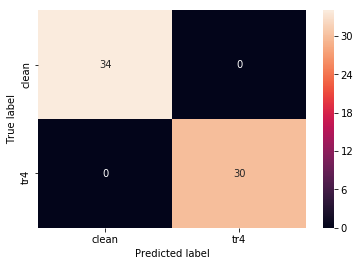

In [4]:
plot_cm('predictions/brightfield_pred.npy', 'predictions/brightfield_test.npy')

<class 'matplotlib.axes._subplots.AxesSubplot'>


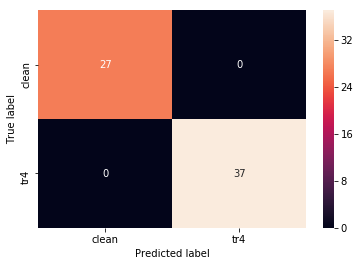

In [5]:
plot_cm('predictions/darkfield_pred.npy', 'predictions/darkfield_test.npy')

<class 'matplotlib.axes._subplots.AxesSubplot'>


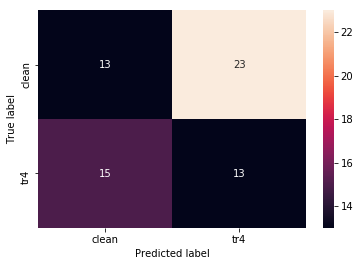

In [6]:
plot_cm('predictions/fluorescent_pred.npy', 'predictions/fluorescent_test.npy')